In [8]:
import pandas as pd
import seaborn as sns
import datetime as dt
import pickle
import json
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 1. Load config file

In [9]:
with open("../src/config.json") as f:
    config = json.load(f)

### 2. Read and explore data
The original datafile is 16GB which is too large to read directly, therefore sampling first 100 rows to take a look at the data

In [12]:
chunksize = 100
for df in pd.read_stata(config['raw_data'], chunksize=chunksize, iterator=True):
    print(df)
    df.to_csv(config['data_path']+'sample_100_rows_raw_data.csv', index=False)
    break

   company_name            website headquarters_location number_of_employees  \
0     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
1     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
2     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
3     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
4     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
5     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
6     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
7     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
8     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
9     Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
10    Microsoft  www.microsoft.com           Redmond, WA    10000+ employees   
11    Microsoft  www.microsoft.com      

In [13]:
df.head()

,company_name,website,headquarters_location,number_of_employees,part_of,now_known_as,founded,company_type,industry,revenue,competitors,number_of_reviews,number_of_salaries,number_of_jobs,number_of_interviews,number_of_benefits,company_overal_rating,company_culture_and_value_rating,company_work_life_balance_rating,company_senior_management_rating,company_comp_and_benefits_rating,compary_career_opportunities_rat,company_recommend_this_company_p,company_approves_of_ceo_percent,company_positive_business_outloo,ceo_name,company_number_of_approves_of_ce,review_date,review_overall_rating,review_culture_and_value_rating,review_work_life_balance_rating,review_senior_management_rating,review_comp_and_benefits_rating,review_career_opportunities_rati,review_approves_of_ceo,number_of_people_found_this_revi,review_title,review_job_title,review_employee_status,reviewer_location,reviewer_form_of_employment,reviewer_lenght_of_employment,review_pros,review_cons,review_advice_to_senior_manageme,recommend_this_company,review_business_outlook
0,Microsoft,www.microsoft.com,"Redmond, WA",10000+ employees,,NaN,1975,Company - Public (MSFT),Information Technology,$10+ billion (USD) per year,"Google, Amazon.com, Apple",15130,41k,8.1k,6.1k,5.1k,4.0,3.8,3.7,3.4,4.1,3.8,85,95,73,Satya Nadella,4612,01/28/2013,4,2.0,4.0,NaN,4.0,2.0,,992.0,Thoughts after 10 years....,Anonymous Employee,Current Employee,"Redmond, WA",full-time,More than 10 years,"1. If you love tech, this is a great place. No...",Brand on Your Resume: After many years of losi...,I'll type it here - but I don't they are liste...,,
1,Microsoft,www.microsoft.com,"Redmond, WA",10000+ employees,,NaN,1975,Company - Public (MSFT),Information Technology,$10+ billion (USD) per year,"Google, Amazon.com, Apple",15130,41k,8.1k,6.1k,5.1k,4.0,3.8,3.7,3.4,4.1,3.8,85,95,73,Satya Nadella,4612,01/12/2016,5,5.0,5.0,5.0,5.0,5.0,Approves of CEO,109.0,Great company to work for,Software Development Engineer,Current Employee,"Redmond, WA",full-time,Less than a year,You get what you put in. If you want a good wo...,Some people are frustrated with the small scop...,,Recommends,Positive Outlook
2,Microsoft,www.microsoft.com,"Redmond, WA",10000+ employees,,NaN,1975,Company - Public (MSFT),Information Technology,$10+ billion (USD) per year,"Google, Amazon.com, Apple",15130,41k,8.1k,6.1k,5.1k,4.0,3.8,3.7,3.4,4.1,3.8,85,95,73,Satya Nadella,4612,01/05/2017,5,5.0,5.0,5.0,5.0,5.0,,NaN,Video Producer,Video Producer,Current Contractor,,,,Great place to work. Pay is really good,I don't have any cons to add,,,
3,Microsoft,www.microsoft.com,"Redmond, WA",10000+ employees,,NaN,1975,Company - Public (MSFT),Information Technology,$10+ billion (USD) per year,"Google, Amazon.com, Apple",15130,41k,8.1k,6.1k,5.1k,4.0,3.8,3.7,3.4,4.1,3.8,85,95,73,Satya Nadella,4612,01/05/2017,4,NaN,NaN,NaN,NaN,NaN,Approves of CEO,NaN,Executive Business Administrator,Anonymous Employee,Current Employee,,full-time,,"Benefits, job flexibility, networking, atmosph...","Work/life balance, advancement opportunities f...","Provide more remote/telework opportunities, as...",Recommends,Positive Outlook
4,Microsoft,www.microsoft.com,"Redmond, WA",10000+ employees,,NaN,1975,Company - Public (MSFT),Information Technology,$10+ billion (USD) per year,"Google, Amazon.com, Apple",15130,41k,8.1k,6.1k,5.1k,4.0,3.8,3.7,3.4,4.1,3.8,85,95,73,Satya Nadella,4612,01/06/2017,4,4.0,5.0,4.0,4.0,4.0,Approves of CEO,NaN,Lots of career opportunities,Anonymous Employee,Current Employee,"Redmond, WA",full-time,More than 8 years,Large company with lots of opportunities; one ...,"Too big, overlap in roles, silos, too much tim...",,Recommends,Positive Outlook


#### Explore number of reviews by year

In [17]:
chunksize = 500000 # data is too large, read by chunks of 500,000
chunk_count = 0
df_company = pd.DataFrame(columns = ['review_year'])
for df in pd.read_stata(config['raw_data'], chunksize = chunksize, iterator = True, 
                        columns = ['company_name','industry','review_date']):
    chunk_count += 1
    iter_start = dt.datetime.now()
    print('iteration {} starts'.format(chunk_count))
    print(' {} rows'.format(chunk_count*chunksize))
    df['review_year'] = pd.DatetimeIndex(df['review_date']).year
    df_company_batch = pd.DataFrame(df.groupby(['company_name','review_year'])['review_year'].count())
    df_company = pd.concat([df_company, df_company_batch])
    print('iteration {} completed in {} seconds'.format(chunk_count,(dt.datetime.now() - iter_start).seconds))

iteration 1 starts
 500000 rows
iteration 1 completed in 0 seconds
iteration 2 starts
 1000000 rows
iteration 2 completed in 0 seconds
iteration 3 starts
 1500000 rows
iteration 3 completed in 0 seconds
iteration 4 starts
 2000000 rows
iteration 4 completed in 0 seconds
iteration 5 starts
 2500000 rows
iteration 5 completed in 0 seconds
iteration 6 starts
 3000000 rows
iteration 6 completed in 0 seconds
iteration 7 starts
 3500000 rows
iteration 7 completed in 1 seconds
iteration 8 starts
 4000000 rows
iteration 8 completed in 0 seconds
iteration 9 starts
 4500000 rows
iteration 9 completed in 0 seconds
iteration 10 starts
 5000000 rows
iteration 10 completed in 0 seconds
iteration 11 starts
 5500000 rows
iteration 11 completed in 0 seconds
iteration 12 starts
 6000000 rows
iteration 12 completed in 0 seconds
iteration 13 starts
 6500000 rows
iteration 13 completed in 0 seconds
iteration 14 starts
 7000000 rows
iteration 14 completed in 0 seconds
iteration 15 starts
 7500000 rows
itera

In [18]:
# unstack the index of company-year
df_company = df_company.reset_index()  
df_company[['company', 'year']] = pd.DataFrame(df_company['index'].tolist(), index=df_company.index) 

<AxesSubplot:xlabel='year', ylabel='review_year'>

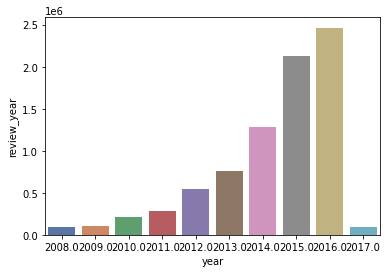

In [19]:
# histogram of number of reviews by year
df_year = pd.DataFrame(df_company.groupby(['year'])['review_year'].sum())
x = df_year.index
y = df_year.review_year
sns.barplot(x = x, y = y, palette = "deep")

Year 2016 has the most reviews. For the purpose of testing code, will create subsample for year 2016 to do topic modelling.
#### Explore number of reviews by company

In [20]:
df_company2 = pd.DataFrame(df_company[df_company['year']==2016].groupby(['company'])['review_year'].sum())
df_company2.describe()

,review_year
count,179386.000000
mean,13.732805
std,341.424004
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,109384.000000


There are 179386 companies that have reviews in year 2016

In [22]:
df_company3 = df_company2[df_company2['review_year']>4][df_company2['review_year']<100]

<ipython-input-22-32f6b8128a37>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_company3 = df_company2[df_company2['review_year']>4][df_company2['review_year']<100]


<AxesSubplot:ylabel='Frequency'>

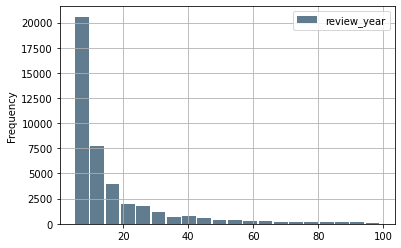

In [23]:
df_company3.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [24]:
df_company2[df_company2['review_year']>20].shape

(11334, 1)

11334 companies have >20 reviews in year 2016. We will use companies that have more than 20 reviews in 2016 to do the topic modelling.

### Save the list of company names to be explored

In [26]:
company_subsample = df_company2[df_company2['review_year']>20].index.tolist()
# a list of company names that I will use
with open(config['data_path']+'subsample_company_list.pkl', 'wb') as f:
    pickle.dump([company_subsample], f)

### Save reviews of subset companies in year 2016

In [29]:
def save_review_subset(review_col, frac=0.1, review_year=2016):
    chunk_count = 0
    for df in pd.read_stata(config['raw_data'], chunksize=100000, columns=[review_col, 'review_date', 'company_name'], iterator=True):
        chunk_count += 1
        iter_start = dt.datetime.now()
        print(f"iteration {chunk_count} starts")
        df['review_year'] = pd.DatetimeIndex(df['review_date']).year
        df_subsample = df[df['review_year']==review_year]
        df_subsample = df_subsample[df_subsample['company_name'].isin(company_subsample)]
        df_subsample = df_subsample.sample(frac=frac, random_state=1) # take 10% sample from the whole set
        if chunk_count == 1:
            df_sub = df_subsample
        else:
            df_sub = pd.concat([df_sub, df_subsample])
        print(f"sub sample has {df_sub.shape[0]} rows in total")
        print(f"iteration {chunk_count} completed in {(dt.datetime.now()-iter_start).seconds} seconds")
    with open(config['data_path']+'processed/'+review_col+'_subset.pkl', 'wb') as f:
        pickle.dump(df_sub, f)

In [31]:
save_review_subset('review_pros')

iteration 1 starts
sub sample has 2831 rows in total
iteration 1 completed in 1 seconds
iteration 2 starts
sub sample has 5611 rows in total
iteration 2 completed in 0 seconds
iteration 3 starts
sub sample has 8483 rows in total
iteration 3 completed in 0 seconds
iteration 4 starts
sub sample has 11410 rows in total
iteration 4 completed in 0 seconds
iteration 5 starts
sub sample has 14383 rows in total
iteration 5 completed in 0 seconds
iteration 6 starts
sub sample has 16963 rows in total
iteration 6 completed in 0 seconds
iteration 7 starts
sub sample has 19871 rows in total
iteration 7 completed in 0 seconds
iteration 8 starts
sub sample has 22987 rows in total
iteration 8 completed in 0 seconds
iteration 9 starts
sub sample has 25878 rows in total
iteration 9 completed in 0 seconds
iteration 10 starts
sub sample has 28752 rows in total
iteration 10 completed in 0 seconds
iteration 11 starts
sub sample has 31583 rows in total
iteration 11 completed in 0 seconds
iteration 12 starts


In [32]:
save_review_subset('review_cons')

iteration 1 starts
sub sample has 2831 rows in total
iteration 1 completed in 1 seconds
iteration 2 starts
sub sample has 5611 rows in total
iteration 2 completed in 0 seconds
iteration 3 starts
sub sample has 8483 rows in total
iteration 3 completed in 0 seconds
iteration 4 starts
sub sample has 11410 rows in total
iteration 4 completed in 0 seconds
iteration 5 starts
sub sample has 14383 rows in total
iteration 5 completed in 0 seconds
iteration 6 starts
sub sample has 16963 rows in total
iteration 6 completed in 0 seconds
iteration 7 starts
sub sample has 19871 rows in total
iteration 7 completed in 0 seconds
iteration 8 starts
sub sample has 22987 rows in total
iteration 8 completed in 0 seconds
iteration 9 starts
sub sample has 25878 rows in total
iteration 9 completed in 0 seconds
iteration 10 starts
sub sample has 28752 rows in total
iteration 10 completed in 0 seconds
iteration 11 starts
sub sample has 31583 rows in total
iteration 11 completed in 0 seconds
iteration 12 starts
